## Задача 7.1

In [1]:
%matplotlib inline  
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm

Определим изначальные параметры для выборок и уровень доверия $\alpha$

In [2]:
theta = 10
par = (10,3)
alpha = 0.95
size = 100

## Равномерное распределение
Пусть $X_1,...,X_n$ выборка из равномерного распределения $[0, \theta]$, $\theta > 0$. Построим доверительный интервал уровня доверия $\alpha$

## Используя статистику $\overline{X}$
Доверительный интервал
$\theta \in \left( \frac{2\overline{X}}{1 + \epsilon}, \ \frac{2\overline{X}}{1 - \epsilon} \right)$ где  $\epsilon=\sqrt{\frac{1}{3 n (1-\alpha)}}$

In [3]:
def ConfidenceFunc1(x, alpha, mode):
    result = np.zeros(len(x)+1)
    for i in range(1, len(x)+1):
        if mode == "up":
            a = 2*np.mean(x[:i])
            b = (1 - np.sqrt(1/(3*len(x[:i]*(1-alpha)))))
            if b!=0:
                result[i] = a/b
        if mode == "down":
            a = 2*np.mean(x[:i])
            b = (1 + np.sqrt(1/(3*len(x[:i]*(1-alpha)))))
            if b!=0:
                result[i] = a/b
    return result

## Используя статистику $X_{(1)}$
Доверительный интервал
$\theta \in \left( X_{(1)}, \ \frac{X_{(1)}}{1 - \sqrt[n]{\alpha}} \right)$

In [4]:
def ConfidenceFunc2(x, alpha, mode):
    result = np.zeros(len(x)+1)
    for i in range(1, len(x)+1):
        if mode == "up":
            a = np.min(x[:i])
            b = 1 - (alpha**(1/len(x[:i])))
            if b!=0:
                result[i] = a/b
        if mode == "down":
            result[i] = np.min(x[:i])
    return result

## Используя статистику $X_{(n)}$
Доверительный интервал
$\theta \in \left( X_{(n)}, \ \frac{X_{(n)}}{\sqrt[n]{1 - \alpha}} \right)$

In [5]:
def ConfidenceFunc3(x, alpha, mode):
    result = np.zeros(len(x)+1)
    for i in range(1, len(x)+1):
        if mode == "up":
            a = np.max(x[:i])
            b =  ((1-alpha)**(1/len(x[:i])))
            if b!=0:
                result[i] = a/b
        if mode == "down":
            result[i] = np.max(x[:i])
    return result

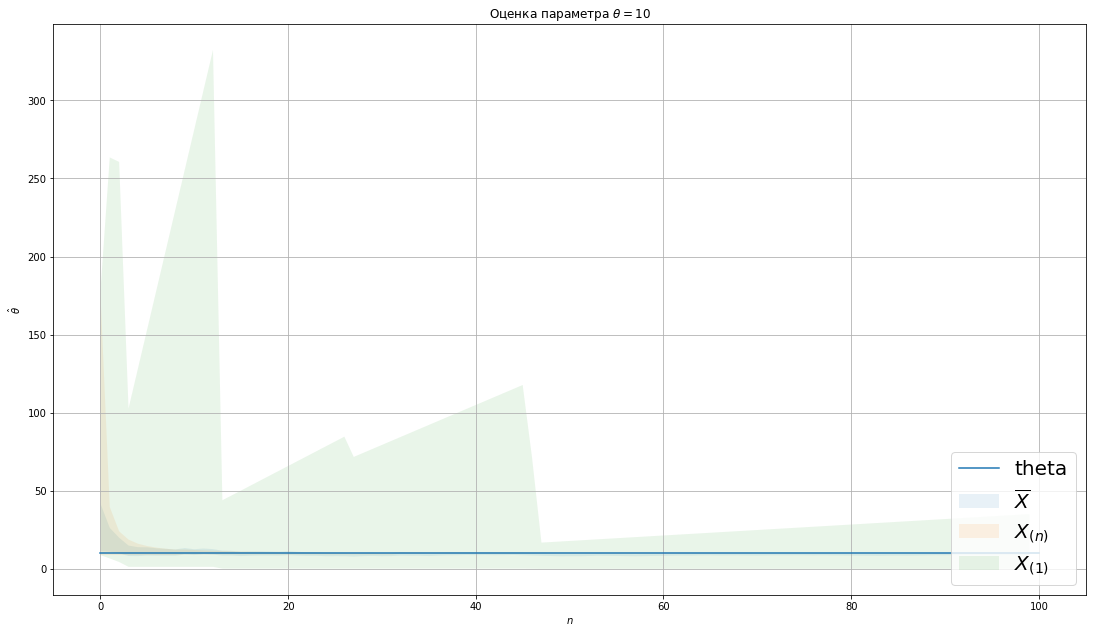

In [6]:
a = np.zeros(size)
sample = st.uniform.rvs(loc=0, scale=theta,size = size)

plt.plot(np.arange(size+1), theta*np.ones(size+1), label = r'theta')
plt.fill_between(np.arange(size), ConfidenceFunc1(sample, alpha, "up")[1:], ConfidenceFunc1(sample, alpha, "down")[1:],alpha=0.1,
                label = r'$\overline{X}$')
plt.fill_between(np.arange(size), ConfidenceFunc3(sample, alpha, "up")[1:], ConfidenceFunc3(sample, alpha, "down")[1:],alpha=0.1,
                label = r'$X_{(n)}$')
plt.fill_between(np.arange(size), ConfidenceFunc2(sample, alpha, "up")[1:], ConfidenceFunc2(sample, alpha, "down")[1:],alpha=0.1,
                label = r'$X_{(1)}$')
plt.legend(fontsize=20, loc=4)
plt.title (r'Оценка параметра $\theta = 10$')
plt.xlabel(r'$n$')
plt.ylabel(r'$\hat{\theta}$')
fig = plt.gcf()
plt.grid(True)
fig.set_size_inches(18.5, 10.5)
plt.show()

Построим график без доверительного интервала от статистики $X_{(1)}$

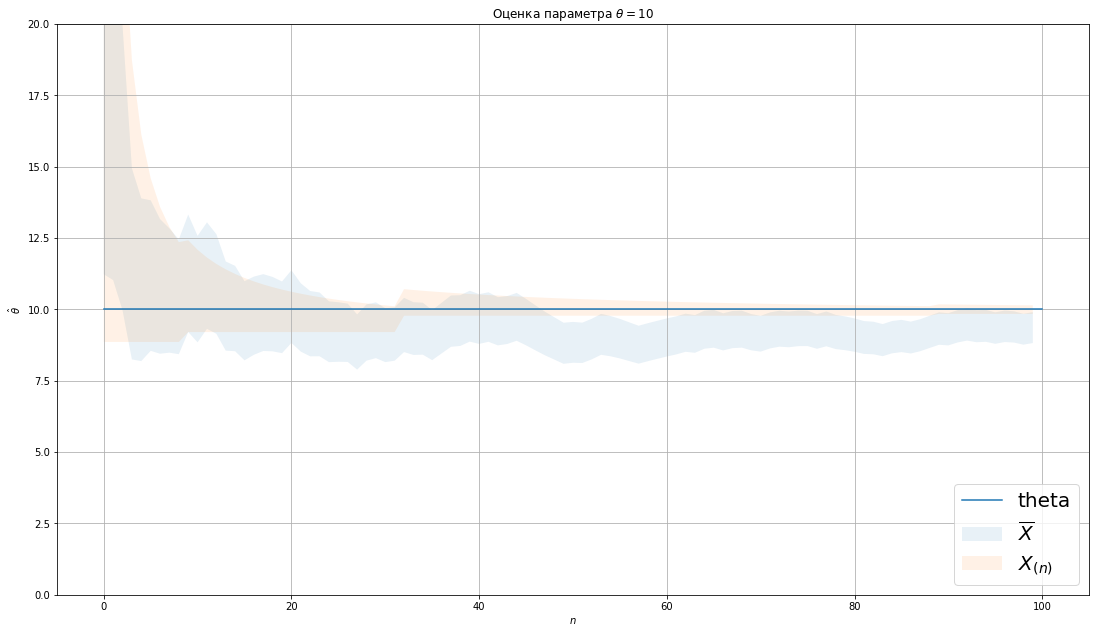

In [7]:
plt.plot(np.arange(size+1), theta*np.ones(size+1), label = r'theta')
plt.fill_between(np.arange(size), ConfidenceFunc1(sample, alpha, "up")[1:], ConfidenceFunc1(sample, alpha, "down")[1:],alpha=0.1,
                label = r'$\overline{X}$')
plt.fill_between(np.arange(size), ConfidenceFunc3(sample, alpha, "up")[1:], ConfidenceFunc3(sample, alpha, "down")[1:],alpha=0.1,
                label = r'$X_{(n)}$')
plt.legend(fontsize=20, loc=4)
plt.title (r'Оценка параметра $\theta = 10$')
plt.xlabel(r'$n$')
plt.ylabel(r'$\hat{\theta}$')
fig = plt.gcf()
plt.grid(True)
fig.set_size_inches(18.5, 10.5)
plt.ylim(0,20)
plt.show()

Оценим вероятность попадания истинного значения $\theta$ в доверительный интервал

In [8]:
p100 = np.zeros(3)
Q = 100
for i in range(Q):
        temp_sample = st.uniform.rvs(loc=0, scale=theta,size = size)
        if theta <= ConfidenceFunc1(temp_sample, alpha, "up")[100] and theta >= ConfidenceFunc1(temp_sample, alpha, "down")[100]:
            p100[0] += 1
        if theta <= ConfidenceFunc2(temp_sample, alpha, "up")[100] and theta >= ConfidenceFunc2(temp_sample, alpha, "down")[100]:
            p100[1] += 1
        if theta <= ConfidenceFunc3(temp_sample, alpha, "up")[100] and theta >= ConfidenceFunc3(temp_sample, alpha, "down")[100]:
            p100[2] += 1
print("Оценка вероятности попадания истинного значения параметра в доверительный интервал при n = 100")
print(r'Используя статистику (1) p = ',int(100*(p100[0]/Q)), "%")
print(r'Используя статистику (2) p = ',int(100*(p100[1]/Q)), "%")
print(r'Используя статистику (3) p = ',int(100*(p100[2]/Q)), "%")

Оценка вероятности попадания истинного значения параметра в доверительный интервал при n = 100
Используя статистику (1) p =  67 %
Используя статистику (2) p =  95 %
Используя статистику (3) p =  98 %


Оценим вероятность попадания для $n= 1000$ выборок

In [9]:
p100 = np.zeros(3)
Q = 1000
for i in range(Q):
        temp_sample = st.uniform.rvs(loc=0, scale=theta,size = size)
        if theta <= ConfidenceFunc1(temp_sample, alpha, "up")[100] and theta >= ConfidenceFunc1(temp_sample, alpha, "down")[100]:
            p100[0] += 1
        if theta <= ConfidenceFunc2(temp_sample, alpha, "up")[100] and theta >= ConfidenceFunc2(temp_sample, alpha, "down")[100]:
            p100[1] += 1
        if theta <= ConfidenceFunc3(temp_sample, alpha, "up")[100] and theta >= ConfidenceFunc3(temp_sample, alpha, "down")[100]:
            p100[2] += 1
print("Оценка вероятности попадания истинного значения параметра в доверительный интервал при n = 1000")
print(r'Используя статистику (1) p = ',int(100*(p100[0]/Q)), "%")
print(r'Используя статистику (2) p = ',int(100*(p100[1]/Q)), "%")
print(r'Используя статистику (3) p = ',int(100*(p100[2]/Q)), "%")

Оценка вероятности попадания истинного значения параметра в доверительный интервал при n = 1000
Используя статистику (1) p =  69 %
Используя статистику (2) p =  94 %
Используя статистику (3) p =  94 %


## Вывод
Уровень доверия выполнился у ДИ по статистике $X_{(1)}$  и $X_{(n)}$, но в случае ДИ $X_{(1)}$ он не состоятельный и наименнее информативен по сравнению с остальными так как при росте $n$ ширина итервала только растет. Наиболее информативным является ДИ по статистике $X_{(n)}$ так как его ширина очень мала с ростом $n$ и есть требуемый уровень доверия.

## Распределение Коши со сдвигом
Пусть $X_1,...,X_n$ выборка из распределения Коши со сдвигом $\theta$. Построим доверительный интервал уровня доверия $\alpha$

Асимтотический доверительный интервал
$\theta \in \left( \hat{\mu} - u_{ \frac{1 - \alpha}{2}} \frac{\pi}{2\sqrt{n}},\ \hat{\mu} - u_{\frac{1 + \alpha}{2}} \frac{\pi}{2\sqrt{n}} \right)$, где $\hat{\mu}$ - выборочная медиана , а $u_{1 - \frac{\alpha}{2}}$ это $1 - \frac{\alpha}{2}$-квантиль 
и $u_{1 +\frac{\alpha}{2}}$  $1 + \frac{\alpha}{2}$-квантиль
стандартного нормального распределения

In [10]:
def ConfidenceFuncCauchy(x, alpha, mode):
    result = np.zeros(len(x)+1)
    for i in range(1, len(x)+1):
        mediana = np.median(x[:i])
        u1 = st.norm.ppf((1 + alpha)/2)
        u2 = st.norm.ppf((1 - alpha)/2)
        if mode == "up":
            result[i] = mediana - (u2*math.pi)/(2*np.sqrt(len(x[:i])))
        if mode == "down":
            result[i] = mediana - (u1*math.pi)/(2*np.sqrt(len(x[:i])))
    return result

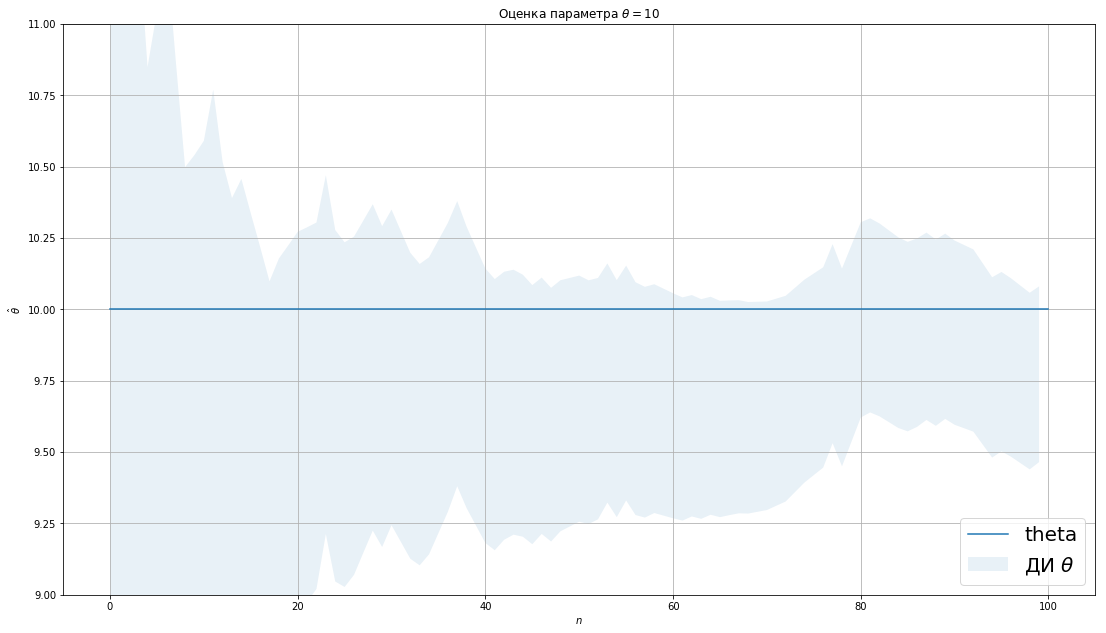

In [11]:
a = np.zeros(size)
sample = st.cauchy.rvs(loc=theta, size = size)

plt.plot(np.arange(size+1), theta*np.ones(size+1), label = r'theta')
plt.fill_between(np.arange(size), ConfidenceFuncCauchy(sample, alpha, "up")[1:],  ConfidenceFuncCauchy(sample, alpha , "down")[1:],alpha=0.1,
                label = r'ДИ $\theta$')
plt.legend(fontsize=20, loc=4)
plt.title (r'Оценка параметра $\theta = 10$')
plt.xlabel(r'$n$')
plt.ylabel(r'$\hat{\theta}$')
fig = plt.gcf()
plt.grid(True)
fig.set_size_inches(18.5, 10.5)
plt.ylim(9, 11)
plt.show()

In [12]:
pc100 = 0
Q = 100
for i in range(Q):
        temp_sample = st.cauchy.rvs(loc=theta, size = size)
        if theta <= ConfidenceFuncCauchy(temp_sample, alpha, "up")[100] and theta >= ConfidenceFuncCauchy(temp_sample, alpha, "down")[100]:
            pc100 += 1
print("Оценка вероятности попадания истинного значения параметра в доверительный интервал при n = 100")
print(r'p = ',int(100*(pc100/Q)), "%")

Оценка вероятности попадания истинного значения параметра в доверительный интервал при n = 100
p =  96 %


In [13]:
pc100 = 0
Q = 1000
for i in range(Q):
        temp_sample = st.cauchy.rvs(loc=theta, size = size)
        if theta <= ConfidenceFuncCauchy(temp_sample, alpha, "up")[100] and theta >= ConfidenceFuncCauchy(temp_sample, alpha, "down")[100]:
            pc100 += 1
print("Оценка вероятности попадания истинного значения параметра в доверительный интервал при n = 1000")
print(r'p = ',int(100*(pc100/Q)), "%")

Оценка вероятности попадания истинного значения параметра в доверительный интервал при n = 1000
p =  93 %


## Вывод
Уровень доверия выполнился и так это асимтотический доверительный интервал, то с ростом N - число элементов выборки, уровень доверия стремится к $\alpha$. Что мы и наблюдаем на графике. 

## Распределение Пуассона 
Пусть $X_1,...,X_n$ выборка из пуассоновского распределения $\theta$. Построим доверительный интервал уровня доверия $\alpha$

Доверительный интервал
$\theta \in \left( \overline{X}-u_{\frac{1-\alpha}{2}} \sqrt{\frac{\overline{X}}{n}},\ \overline{X} - u_{\frac{1+\alpha}{2}} \sqrt{\frac{\overline{X}}{n}} \right)$, где $u_{\frac{1-\alpha}{2}}$ - это $1 - \frac{\alpha}{2}$-квантиль 
и $u_{1 +\frac{\alpha}{2}}$  $1 + \frac{\alpha}{2}$-квантиль
стандартного нормального распределения

In [14]:
def ConfidenceFuncPois(x, alpha, mode):
    result = np.zeros(len(x)+1)
    for i in range(1, len(x)+1):
        u1 = st.norm.ppf((1 + alpha)/2, loc=0, scale=1)
        u2 = st.norm.ppf((1 - alpha)/2, loc=0, scale=1)
        if mode == "up":
            result[i] = np.mean(x[:i]) - u2*np.sqrt(np.mean(x[:i])/len(x[:i]))
        if mode == "down":
            result[i] = np.mean(x[:i]) - u1*np.sqrt(np.mean(x[:i])/len(x[:i]))
    return result

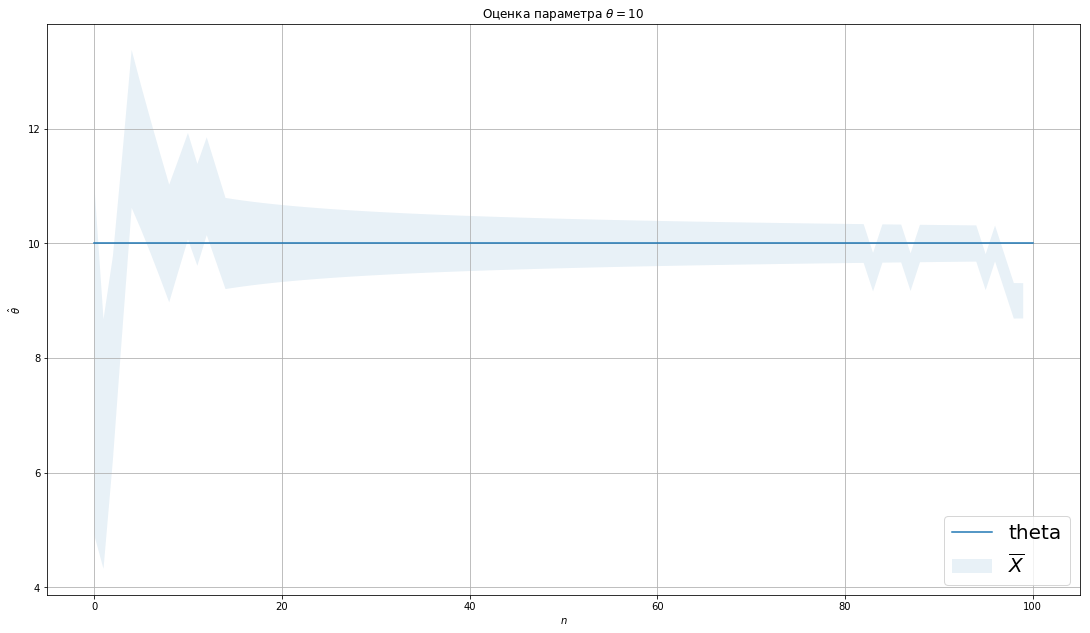

In [15]:
a = np.zeros(size)
sample = st.poisson.rvs(mu = theta, size = size)

plt.plot(np.arange(size+1), theta*np.ones(size+1), label = r'theta')
plt.fill_between(np.arange(size), ConfidenceFuncCauchy(sample, alpha, "up")[1:],  ConfidenceFuncCauchy(sample, alpha , "down")[1:],alpha=0.1,
                label = r'$\overline{X}$')
plt.legend(fontsize=20, loc=4)
plt.title (r'Оценка параметра $\theta = 10$')
plt.xlabel(r'$n$')
plt.ylabel(r'$\hat{\theta}$')
fig = plt.gcf()
plt.grid(True)
fig.set_size_inches(18.5, 10.5)

plt.show()

In [16]:
pp100 = 0
Q = 100
for i in range(Q):
        temp_sample = st.poisson.rvs(mu = theta, size = size)
        if theta <= ConfidenceFuncPois(temp_sample, alpha, "up")[100] and theta >= ConfidenceFuncPois(temp_sample, alpha, "down")[100]:
            pp100 += 1
print("Оценка вероятности попадания истинного значения параметра в доверительный интервал при n = 100")
print(r'p = ',int(100*(pp100/Q)), "%")

Оценка вероятности попадания истинного значения параметра в доверительный интервал при n = 100
p =  96 %


## Вывод
Уровень доверия выполнился. На графике видим, что доверительный интервал является асимтотическим и при больших $n$ стягивается к истинному параметру.

## Гамма распределение
Пусть $X_1,...,X_n$ выборка из гамма распределения $(\theta, \lambda)$. Построим доверительный интервал уровня доверия $\alpha$

Считая, что $\lambda$ известно

$\theta \in \left(\frac{1}{\lambda} \cdot (\overline{X} - u_{\frac{1+\alpha}{2}} \sqrt\frac{\overline{X}}{\lambda n}),\ \frac{1}{\lambda} \cdot (\overline{X} - u_{\frac{1-\alpha}{2}} \sqrt\frac{\overline{X}}{\lambda n}) \right)$, где $u_{\frac{1+\alpha}{2}}$ - $\frac{1+\alpha}{2}$ - квантиль стандартного нормального распределения

In [17]:
def ConfidenceFuncGamma(x, alpha, beta, mode):
    result = np.zeros(len(x)+1)
    for i in range(1, len(x)+1):
        u1 = st.norm.ppf((1 + alpha)/2)
        u2 = st.norm.ppf((1 - alpha)/2)
        if mode == "up":
            result[i] =  (1/beta)*(np.mean(x[:i]) - u2*np.sqrt(np.mean(x[:i])/(1/beta*len(x))) )
        if mode == "down":
            result[i] =  (1/beta)*(np.mean(x[:i]) - u1*np.sqrt(np.mean(x[:i])/(1/beta*len(x))) )
    return result

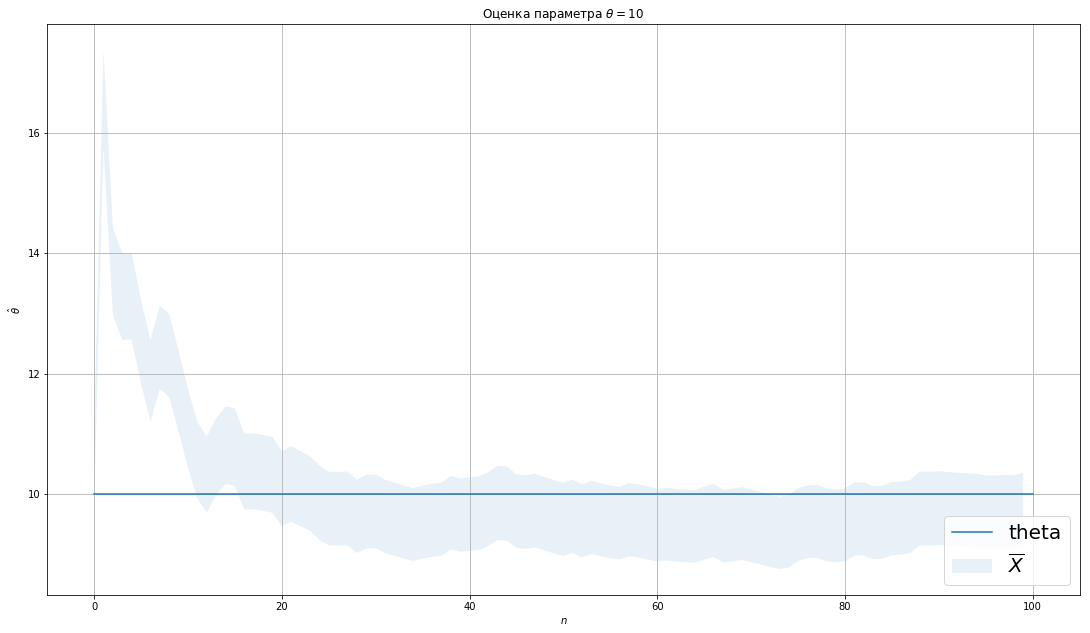

In [18]:
a = np.zeros(size)
sample = st.gamma.rvs(par[0], scale = par[1], size = 100)

plt.plot(np.arange(size+1), par[0]*np.ones(size+1), label = r'theta')
plt.fill_between(np.arange(size), ConfidenceFuncGamma(sample, alpha, par[1], "up")[1:],  ConfidenceFuncGamma(sample, alpha, par[1], "down")[1:],alpha=0.1,
                label = r'$\overline{X}$')
plt.legend(fontsize=20, loc=4)
plt.title (r'Оценка параметра $\theta = 10$')
plt.xlabel(r'$n$')
plt.ylabel(r'$\hat{\theta}$')
fig = plt.gcf()
plt.grid(True)
fig.set_size_inches(18.5, 10.5)

plt.show()

In [19]:
pg100 = 0
Q = 100
for i in range(Q):
        temp_sample = st.gamma.rvs(par[0], scale = par[1], size = 100)
        if theta <= ConfidenceFuncGamma(temp_sample, alpha, par[1], "up")[100] and theta >= ConfidenceFuncGamma(temp_sample, alpha,par[1], "down")[100]:
            pg100 += 1
print("Оценка вероятности попадания истинного значения параметра в доверительный интервал при n = 100")
print(r'При известонм параметре лямбда: p = ',int(100*(pg100/Q)), "%")

Оценка вероятности попадания истинного значения параметра в доверительный интервал при n = 100
При известонм параметре лямбда: p =  98 %


## Вывод
Уровень доверия выполнился
В данном случае интервал является точным асимптотическим доверительным интервалом уровня $\alpha=0.95$ для параметра $\theta$. Наблюдаем, что при увеличении размера выборки интервал сужается к истинному значению параметра(т.к. он асимптотический ДИ)

Считая, что $\lambda$ неизвестно, подставим вместо $\lambda$ ее асимтотически нормальную оценку. То есть $\hat{\lambda} = \frac{S^2}{\overline{X}}$, где $S^2$ выборочная дисперсия.

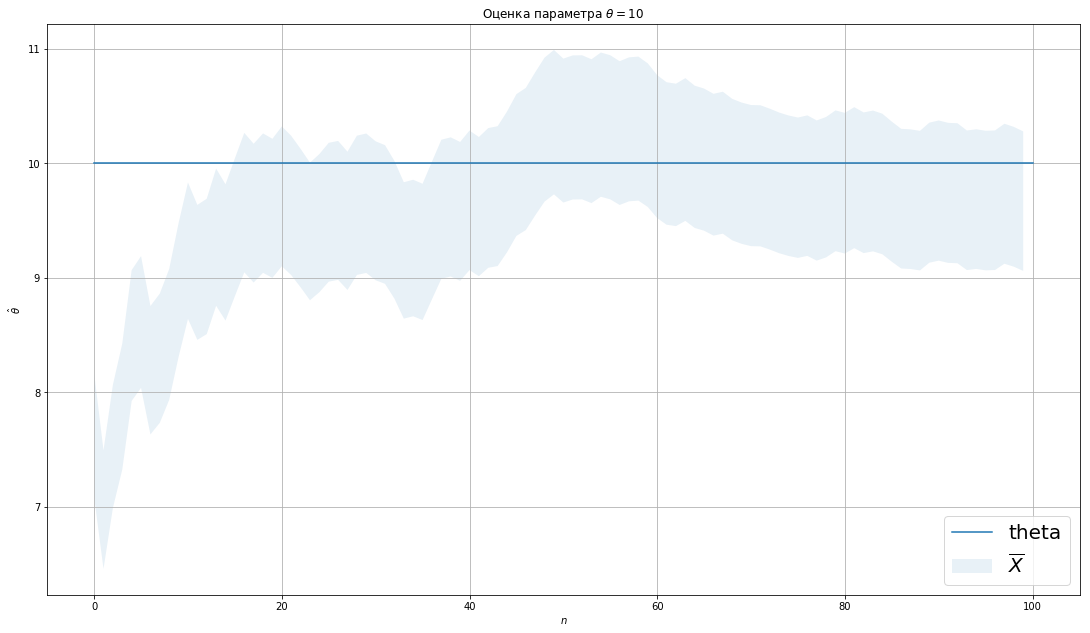

In [20]:
a = np.zeros(size)
sample = st.gamma.rvs(par[0], scale = par[1], size = 100)
beta = st.moment(sample, 2)/(np.mean(sample))
plt.plot(np.arange(size+1), par[0]*np.ones(size+1), label = r'theta')
plt.fill_between(np.arange(size), ConfidenceFuncGamma(sample, alpha,beta, "up")[1:],  ConfidenceFuncGamma(sample, alpha,beta, "down")[1:],alpha=0.1,
                label = r'$\overline{X}$')
plt.legend(fontsize=20, loc=4)
plt.title (r'Оценка параметра $\theta = 10$')
plt.xlabel(r'$n$')
plt.ylabel(r'$\hat{\theta}$')
fig = plt.gcf()
plt.grid(True)
fig.set_size_inches(18.5, 10.5)

plt.show()

In [21]:
pg100 = 0
Q = 100
for i in range(Q):
        temp_sample = st.gamma.rvs(par[0], scale = par[1], size = 100)
        beta = st.moment(temp_sample, 2)/(np.mean(temp_sample))
        if theta <= ConfidenceFuncGamma(temp_sample, alpha, beta, "up")[100] and theta >= ConfidenceFuncGamma(temp_sample, alpha,beta, "down")[100]:
            pg100 += 1
print("Оценка вероятности попадания истинного значения параметра в доверительный интервал при n = 100")
print(r'p = ',int(100*(pg100/Q)), "%")

Оценка вероятности попадания истинного значения параметра в доверительный интервал при n = 100
p =  27 %


В случае неизвестно $\lambda$ доверительный интервал зависит от выборки, так как по этой выборке строится оценка $\lambda$ И так как выборка не сильно большого размера, вероятность попадания истинного значения параметра в доверительный интервал меняется при различных генерациях выборки. Поэтому разумнее в этом случае увеличить количество выборок для определения этой вероятности.

In [22]:
pg100 = 0
Q = 1000
for i in range(Q):
        temp_sample = st.gamma.rvs(par[0], scale = par[1], size = 100)
        beta = st.moment(temp_sample, 2)/(np.mean(temp_sample))
        if theta <= ConfidenceFuncGamma(temp_sample, alpha, beta, "up")[100] and theta >= ConfidenceFuncGamma(temp_sample, alpha,beta, "down")[100]:
            pg100 += 1
print("Оценка вероятности попадания истинного значения параметра в доверительный интервал при n = 1000")
print(r'p = ',int(100*(pg100/Q)), "%")

Оценка вероятности попадания истинного значения параметра в доверительный интервал при n = 1000
p =  33 %


## Вывод
Таким образом доверительные интервалы очень полезный и наглядный метод, который показывает с какой точностью наш параметр лежит в определеннх границах, но как мы увидели не все доверительные интервалы могут быть информативны даже если они с высокой точностью(например когда ДИ был по статистика $X_{(1)}$). Также мы убедились, что в асимтотических доверительных интервалах при увеличении размера выборки интервал сужается к истинному значению параметра.Также мы построили доверительный интервал для первого параметра, оценив второй параметр, что дало относительно неплохую оценку(в смысле абсолютного отклонения от истинного значения параметра) но в таком случае оценка вероятности попадания истинного значения параметра в доверительный интервал значительно меньше, чем в случае известного второго параметра, так как влиет асимтотическая оценка $\lambda$ которую мы подставили. 